In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-delivery-time/deliverytime.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'/kaggle/input/food-delivery-time/deliverytime.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# no duplicates and nulls

In [7]:
# top 5 longest time taken per delivery
df.sort_values(by='Time_taken(min)', ascending=False)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
5596,3D24,COIMBRES16DEL02,33,5.0,11.010375,76.952950,11.140375,77.082950,Snack,motorcycle,54
43930,2FCD,PUNERES12DEL02,38,4.5,18.520016,73.830547,18.600016,73.910547,Drinks,motorcycle,54
13450,19C1,MYSRES09DEL03,23,4.3,12.323194,76.630583,12.353194,76.660583,Drinks,motorcycle,54
38466,418D,VADRES13DEL01,25,4.2,22.310237,73.158921,22.350237,73.198921,Drinks,motorcycle,54
22516,4425,JAPRES05DEL02,31,5.0,26.905287,75.794592,27.035287,75.924592,Meal,motorcycle,54
...,...,...,...,...,...,...,...,...,...,...,...
23176,5725,CHENRES13DEL03,30,4.7,13.027018,80.254791,13.087018,80.314791,Buffet,scooter,10
35671,3.8E+06,HYDRES12DEL02,23,4.7,17.429585,78.392621,17.509585,78.472621,Drinks,scooter,10
17690,7B51,MYSRES03DEL01,22,4.8,12.299524,76.642620,12.309524,76.652620,Drinks,scooter,10
2294,A0AB,HYDRES01DEL02,30,5.0,17.410371,78.437225,17.460371,78.487225,Meal,scooter,10


In [8]:
df[df['Time_taken(min)'] == 54]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
188,4B5B,MYSRES04DEL03,38,4.3,12.308500,76.665808,12.398500,76.755808,Meal,motorcycle,54
641,C2BA,LUDHRES18DEL03,20,3.9,30.890184,75.829615,30.950184,75.889615,Buffet,motorcycle,54
2373,171C,CHENRES04DEL01,31,4.9,13.029780,80.208812,13.139780,80.318812,Snack,motorcycle,54
3103,7A0C,JAPRES09DEL01,39,4.7,26.911378,75.789034,27.021378,75.899034,Buffet,motorcycle,54
3711,5174,MYSRES11DEL03,24,4.5,12.323225,76.630028,12.383225,76.690028,Drinks,motorcycle,54
...,...,...,...,...,...,...,...,...,...,...,...
43537,44AC,VADRES18DEL02,31,4.7,0.000000,0.000000,0.130000,0.130000,Meal,motorcycle,54
43668,7BFE,PUNERES13DEL02,32,4.3,18.562450,73.916619,18.642450,73.996619,Snack,motorcycle,54
43930,2FCD,PUNERES12DEL02,38,4.5,18.520016,73.830547,18.600016,73.910547,Drinks,motorcycle,54
44283,2DDD,MUMRES05DEL01,36,4.8,18.927584,72.832585,18.997584,72.902585,Buffet,motorcycle,54


In [9]:
# longest time taken for delivery is 54 mins, and there are total 91 orders which took 54 mins to deliver order

# Action items 
# 1. Why these orders are taking longer time?
# 2, is there any pattern?



In [10]:
# top 5 shortest time taken per delivery
df.sort_values(by='Time_taken(min)', ascending=True)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
26310,D500,KNPRES07DEL01,26,4.8,26.472001,80.354002,26.542001,80.424002,Drinks,motorcycle,10
31590,8144,MUMRES03DEL02,23,4.8,19.223840,72.841347,19.303840,72.921347,Drinks,electric_scooter,10
3996,E1EC,ALHRES04DEL01,27,4.6,0.000000,0.000000,0.010000,0.010000,Meal,electric_scooter,10
31619,AA5E,JAPRES02DEL02,29,4.6,26.914142,75.805704,26.964142,75.855704,Meal,scooter,10
3966,630C,SURRES06DEL03,22,4.6,21.185047,72.808590,21.245047,72.868590,Snack,scooter,10
...,...,...,...,...,...,...,...,...,...,...,...
9088,7B6A,BANGRES02DEL01,36,4.9,12.970221,77.645396,13.040221,77.715396,Drinks,motorcycle,54
5061,3033,MUMRES12DEL01,33,4.2,19.207222,72.972281,19.277222,73.042281,Buffet,motorcycle,54
3711,5174,MYSRES11DEL03,24,4.5,12.323225,76.630028,12.383225,76.690028,Drinks,motorcycle,54
35083,C98A,KNPRES04DEL02,34,4.6,26.471529,80.313458,26.601529,80.443458,Meal,motorcycle,54


In [11]:
df[df['Time_taken(min)'] == 10]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
36,B3A0,PUNERES18DEL01,20,4.7,18.593481,73.785901,18.633481,73.825901,Snack,scooter,10
75,4B7F,HYDRES13DEL03,26,4.7,17.431477,78.400350,17.491477,78.460350,Buffet,motorcycle,10
378,6226,RANCHIRES12DEL03,24,4.9,0.000000,0.000000,0.060000,0.060000,Snack,motorcycle,10
485,D446,ALHRES08DEL03,28,4.9,25.450329,81.834279,25.540329,81.924279,Drinks,electric_scooter,10
611,D550,ALHRES19DEL03,26,5.0,25.457116,81.859682,25.487116,81.889682,Buffet,scooter,10
...,...,...,...,...,...,...,...,...,...,...,...
45362,8981,BANGRES05DEL02,20,4.7,12.970324,77.645748,13.020324,77.695748,Buffet,scooter,10
45364,199F,RANCHIRES04DEL01,28,4.7,23.359033,85.325347,23.469033,85.435347,Snack,motorcycle,10
45379,3FD5,INDORES13DEL01,24,4.5,22.745049,75.892471,22.855049,76.002471,Buffet,electric_scooter,10
45443,6D97,MYSRES02DEL03,20,4.9,12.304569,76.643622,12.334569,76.673622,Drinks,scooter,10


In [12]:
# shortest time taken is 10 mins, and totally 750 orders delivered within 10 mins

<Axes: >

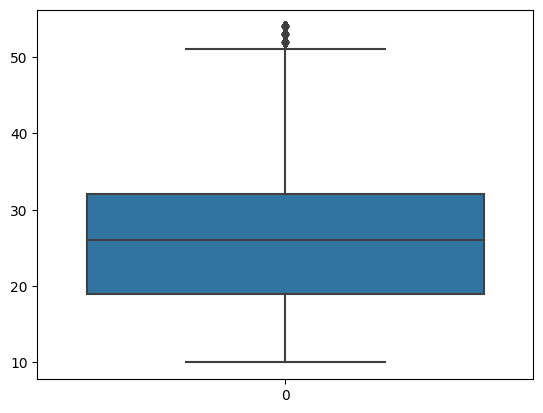

In [13]:
# looking at distribution of time taken
import seaborn as sns
sns.boxplot(df['Time_taken(min)'])

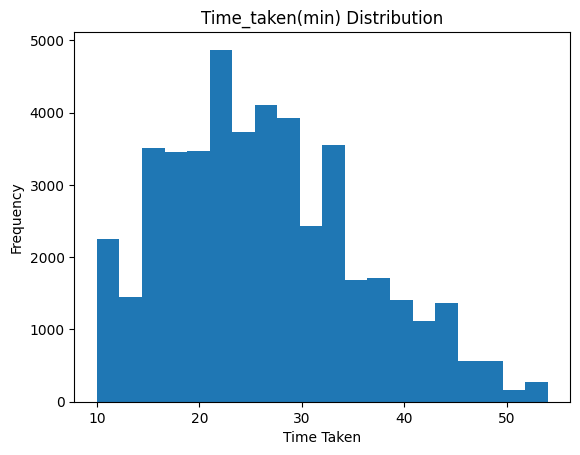

In [14]:
import matplotlib.pyplot as plt
df['Time_taken(min)'].plot(kind='hist', bins=20)
plt.xlabel('Time Taken')
plt.ylabel('Frequency')
plt.title('Time_taken(min) Distribution')
plt.show()


In [15]:
# looking at central tendancy
print(df['Time_taken(min)'].mean())
print(df['Time_taken(min)'].median())
print(df['Time_taken(min)'].mode())

26.29460662821047
26.0
0    26
Name: Time_taken(min), dtype: int64


In [16]:
# mean median and mode is almost same, indication of symmetrically distribution

In [17]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

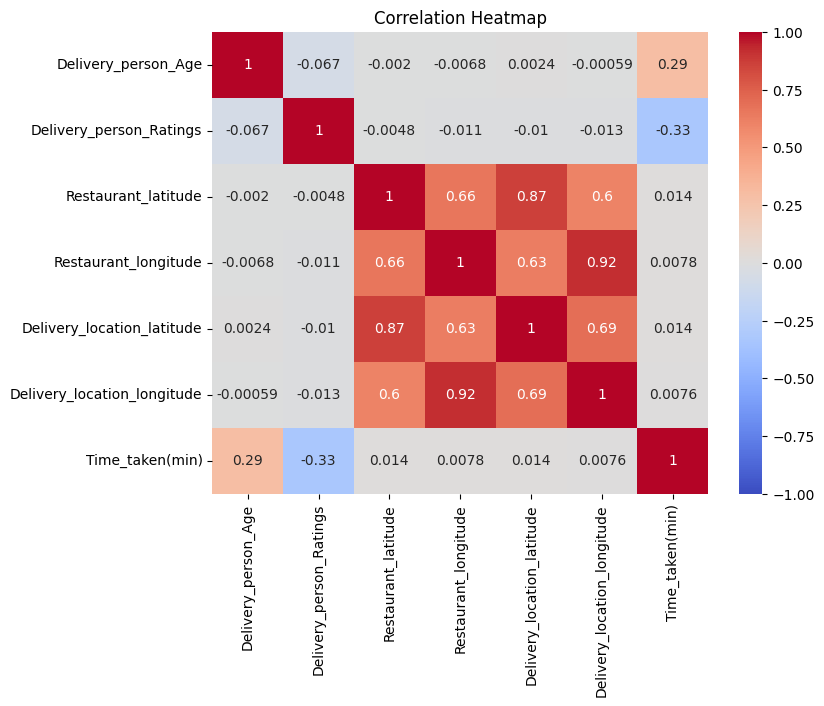

In [18]:
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

In [20]:
# looking at ratings
# gb_ratings = df.groupby(['Delivery_person_Ratings'])
# gb_ratings.first().sort_index(ascending = False)
df.sort_values(by='Delivery_person_Ratings', ascending=False)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
5169,4F2,JAPRES08DEL01,50,6.0,-26.910262,-75.783013,27.020262,75.893013,Drinks,scooter,20
17145,400,COIMBRES07DEL01,50,6.0,10.961850,76.971082,10.971850,76.981082,Snack,electric_scooter,14
3586,46D,BANGRES05DEL01,50,6.0,-12.970324,-77.645748,13.010324,77.685748,Meal,electric_scooter,25
28974,404,CHENRES04DEL01,50,6.0,-13.029780,-80.208812,13.099780,80.278812,Meal,electric_scooter,20
45332,2950,VADRES04DEL02,50,6.0,0.000000,0.000000,0.020000,0.020000,Drinks,electric_scooter,28
...,...,...,...,...,...,...,...,...,...,...,...
25873,BB3,CHENRES15DEL03,15,1.0,13.026286,80.275235,13.116286,80.365235,Drinks,scooter,27
15124,18B0,RANCHIRES02DEL01,15,1.0,0.000000,0.000000,0.070000,0.070000,Meal,bicycle,21
11125,40B,SURRES12DEL01,15,1.0,-21.183434,-72.814492,21.193434,72.824492,Meal,scooter,27
41241,49C,COIMBRES14DEL02,15,1.0,11.003681,76.975525,11.133681,77.105525,Meal,scooter,25


In [21]:
df[df['Delivery_person_Ratings'] == 6.0]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
3586,46D,BANGRES05DEL01,50,6.0,-12.970324,-77.645748,13.010324,77.685748,Meal,electric_scooter,25
4714,493,HYDRES17DEL01,50,6.0,-17.451976,-78.385883,17.561976,78.495883,Snack,bicycle,27
5169,4F2,JAPRES08DEL01,50,6.0,-26.910262,-75.783013,27.020262,75.893013,Drinks,scooter,20
5362,430,BANGRES19DEL01,50,6.0,12.914264,77.678400,13.024264,77.788400,Meal,electric_scooter,18
5651,BEF 1.00,AGRRES13DEL02,50,6.0,-27.159795,-78.042990,27.209795,78.092990,Drinks,scooter,20
6394,427,JAPRES06DEL02,50,6.0,26.911927,75.797282,27.041927,75.927282,Meal,electric_scooter,20
7031,3EB,MYSRES15DEL02,50,6.0,-12.352058,-76.606650,12.372058,76.626650,Buffet,scooter,14
7681,D42,VADRES09DEL01,50,6.0,0.000000,0.000000,0.010000,0.010000,Meal,bicycle,22
9499,3F0,BANGRES010DEL01,50,6.0,12.933298,77.614293,13.003298,77.684293,Drinks,scooter,17
9535,3EF,RANCHIRES13DEL01,50,6.0,-23.374989,-85.335486,23.444989,85.405486,Snack,bicycle,32


In [22]:
len(df[df['Delivery_person_Ratings'] == 6.0])

53

In [23]:
# considering 6.0 as 5.0

In [24]:
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].replace(6.0, 5.0)

In [25]:
len(df[df['Delivery_person_Ratings'] == 6.0])

0

In [26]:
df.head(1)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24


In [27]:
df[df['Time_taken(min)'] == 54][:1]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
188,4B5B,MYSRES04DEL03,38,4.3,12.3085,76.665808,12.3985,76.755808,Meal,motorcycle,54


In [28]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [29]:
# feature enginerring on following columns to calculate distance between two locations based on latitude and longitude 
# Restaurant_latitude Restaurant_longitude Delivery_location_latitude Delivery_location_longitude

In [30]:
!pip install geopy

In [31]:
from geopy.distance import geodesic

# Coordinates of the two points
point1 = (12.913041, 77.683237)
point2 = (13.043041, 77.813237)

# Calculate the distance using geodesic
distance = geodesic(point1, point2).kilometers

print(f"Distance between the points: {distance} km")


Distance between the points: 20.143736910348597 km


In [32]:
def calculate_distance(row):
    point1 = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    point2 = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(point1, point2).kilometers

# Apply the function to each row and add the result as a new column
df['Distance_bet_rest_delivery_km'] = df.apply(calculate_distance, axis=1)


In [33]:
df.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis =1 , inplace=True)

In [34]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),Distance_bet_rest_delivery_km
0,4607,INDORES13DEL02,37,4.9,Snack,motorcycle,24,3.020737
1,B379,BANGRES18DEL02,34,4.5,Snack,scooter,33,20.143737
2,5D6D,BANGRES19DEL01,23,4.4,Drinks,motorcycle,26,1.549693
3,7A6A,COIMBRES13DEL02,38,4.7,Buffet,motorcycle,21,7.774497
4,70A2,CHENRES12DEL01,32,4.6,Snack,scooter,30,6.197898
...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,Meal,motorcycle,32,1.488112
45589,D641,AGRRES16DEL01,21,4.6,Buffet,motorcycle,36,10.983242
45590,4F8D,CHENRES08DEL03,30,4.9,Drinks,scooter,16,4.648024
45591,5EEE,COIMBRES11DEL01,20,4.7,Snack,motorcycle,26,6.219668


In [35]:
df['Type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [36]:
df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [37]:
# intersting to see how many orders were delivered by bicycle
df[df['Type_of_vehicle'] == 'bicycle ']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),Distance_bet_rest_delivery_km
1142,1066,MYSRES05DEL01,29,4.6,Meal,bicycle,28,6.205444
1378,444,JAPRES01DEL01,29,4.6,Meal,bicycle,37,17225.042770
1624,812,JAPRES09DEL01,29,4.6,Buffet,bicycle,13,1.488060
1681,429,HYDRES11DEL03,29,4.6,Buffet,bicycle,18,9.204085
1961,BF39,BHPRES12DEL01,29,4.6,Buffet,bicycle,47,6.276139
...,...,...,...,...,...,...,...,...
42829,492,VADRES19DEL02,29,4.6,Meal,bicycle,47,19.659105
43164,43B,PUNERES13DEL02,29,4.6,Snack,bicycle,37,16648.618230
43407,409,JAPRES18DEL03,29,4.6,Drinks,bicycle,31,13.390340
45067,BEFF,BHPRES15DEL01,29,4.6,Drinks,bicycle,39,16.584480


In [38]:
dummies = pd.get_dummies(df['Type_of_order'], prefix='order')
dummies.drop('order_Buffet ', axis=1, inplace=True)
# dummies.columns
df = pd.concat([df, dummies], axis=1)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),Distance_bet_rest_delivery_km,order_Drinks,order_Meal,order_Snack
0,4607,INDORES13DEL02,37,4.9,Snack,motorcycle,24,3.020737,False,False,True
1,B379,BANGRES18DEL02,34,4.5,Snack,scooter,33,20.143737,False,False,True
2,5D6D,BANGRES19DEL01,23,4.4,Drinks,motorcycle,26,1.549693,True,False,False
3,7A6A,COIMBRES13DEL02,38,4.7,Buffet,motorcycle,21,7.774497,False,False,False
4,70A2,CHENRES12DEL01,32,4.6,Snack,scooter,30,6.197898,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,Meal,motorcycle,32,1.488112,False,True,False
45589,D641,AGRRES16DEL01,21,4.6,Buffet,motorcycle,36,10.983242,False,False,False
45590,4F8D,CHENRES08DEL03,30,4.9,Drinks,scooter,16,4.648024,True,False,False
45591,5EEE,COIMBRES11DEL01,20,4.7,Snack,motorcycle,26,6.219668,False,False,True


In [39]:
dummies = pd.get_dummies(df['Type_of_vehicle'], prefix='vehicle')
dummies.drop('vehicle_bicycle ', axis=1, inplace=True)
# dummies.columns
df = pd.concat([df, dummies], axis=1)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),Distance_bet_rest_delivery_km,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter
0,4607,INDORES13DEL02,37,4.9,Snack,motorcycle,24,3.020737,False,False,True,False,True,False
1,B379,BANGRES18DEL02,34,4.5,Snack,scooter,33,20.143737,False,False,True,False,False,True
2,5D6D,BANGRES19DEL01,23,4.4,Drinks,motorcycle,26,1.549693,True,False,False,False,True,False
3,7A6A,COIMBRES13DEL02,38,4.7,Buffet,motorcycle,21,7.774497,False,False,False,False,True,False
4,70A2,CHENRES12DEL01,32,4.6,Snack,scooter,30,6.197898,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,Meal,motorcycle,32,1.488112,False,True,False,False,True,False
45589,D641,AGRRES16DEL01,21,4.6,Buffet,motorcycle,36,10.983242,False,False,False,False,True,False
45590,4F8D,CHENRES08DEL03,30,4.9,Drinks,scooter,16,4.648024,True,False,False,False,False,True
45591,5EEE,COIMBRES11DEL01,20,4.7,Snack,motorcycle,26,6.219668,False,False,True,False,True,False


In [40]:
df.drop(['Type_of_order','Type_of_vehicle'], axis=1, inplace=True)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),Distance_bet_rest_delivery_km,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter
0,4607,INDORES13DEL02,37,4.9,24,3.020737,False,False,True,False,True,False
1,B379,BANGRES18DEL02,34,4.5,33,20.143737,False,False,True,False,False,True
2,5D6D,BANGRES19DEL01,23,4.4,26,1.549693,True,False,False,False,True,False
3,7A6A,COIMBRES13DEL02,38,4.7,21,7.774497,False,False,False,False,True,False
4,70A2,CHENRES12DEL01,32,4.6,30,6.197898,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,32,1.488112,False,True,False,False,True,False
45589,D641,AGRRES16DEL01,21,4.6,36,10.983242,False,False,False,False,True,False
45590,4F8D,CHENRES08DEL03,30,4.9,16,4.648024,True,False,False,False,False,True
45591,5EEE,COIMBRES11DEL01,20,4.7,26,6.219668,False,False,True,False,True,False


In [41]:
# almost final data
df.to_csv(r'final_data.csv',index=False)